#### EMOTION DETECTION DATASET

## 1.0 DATA SOURCES
The Sentiment Analysis and Emotion Detection dataset was obtained from Kaggle, a leading platform for data science challenges and collaboration. Kaggle empowers data professionals by offering access to diverse datasets and tools to explore real-world problems across various domains.

This dataset falls under the Social Media and Natural Language Processing (NLP) domain and is typically provided in CSV format. It contains user-generated text data, often sourced from platforms like Twitter, labeled with sentiment categories (e.g., positive, negative, neutral) and emotional states (e.g., joy, anger, sadness).

You can explore similar datasets by searching “Sentiment Analysis” or “Emotion Detection” on Kaggle.


You can access the dataset via the following link: [Sentiment Analysis and Emotion Analysis Dataset on Kaggle](https://www.kaggle.com/datasets/kushagra3204/sentiment-and-emotion-analysis-dataset/data)

## 1.1 TOOLS AND ENVIRONMENT
Python Notebook (Jupyter Notebook)

## 1.2 MODELLING APPROACH
Model Build with Random Forest Classifier (LR)

Model Build with Random Forest Classifier (RF)

Model Build with Decision Tree Classifier (DT)

Model Build with Extreme Gradient Boosting (XGB)

Model Build with Long Short-Term Memory (LSTM)

Model Build with Feedforward Neural Network (GRU)

Model Build with Feedforward Neural Network (CNN)

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:

# Standard libraries
import os
import random
import shutil
import warnings
import import_ipynb
import sys

# Data processing libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import scipy.stats as stats
import pyforest
from wordcloud import WordCloud

# Terminal formatting
from colorama import Fore, Style
from termcolor import colored

# Scikit-learn utilities
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, StratifiedKFold, KFold,
    cross_val_predict, cross_val_score, cross_validate, GridSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer,
    MinMaxScaler, LabelEncoder, RobustScaler, label_binarize
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    mean_absolute_error, mean_squared_error, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc,
    make_scorer, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
)
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVR, SVC
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor,
    ExtraTreesRegressor, AdaBoostClassifier
)
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Optimization and tuning
from skopt import BayesSearchCV
from keras_tuner import BayesianOptimization
from keras_tuner.tuners import BayesianOptimization as KerasBayesianOptimization

# XGBoost
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    LSTM, GRU, Conv1D, GlobalMaxPooling1D, Embedding, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [4]:
import sys
sys.path.append('../functions')

from model_function import *

In [5]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Configurations
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Initialize plotly and cufflinks
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [6]:
optimized_models_summary.clear()

In [7]:
data_path = '../dataset/combined_emotion.csv'

In [8]:
df_emo = pd.read_csv(data_path)

In [9]:
print(len(df_emo))
print(len(df_emo.columns))

422746
2


In [10]:
#Check for top 5 datas using .head()
df_emo.head()

sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear

In [11]:
#Check for last 5 datas using .tail()
df_emo.sample(5)

sentence emotion
52840   i feel like i ve been convinced by some indian...     joy
338919  i love the insular feel of island living how g...    fear
4335             i have a feeling that she wasnt thrilled     joy
252892  i have to say since i am feeling so good about...     joy
334554  i feel deeply disturbed that young canadian un...     sad

In [12]:
df_emo.describe()

sentence emotion
count                                          422746  422746
unique                                         393822       6
top     i feel more adventurous willing to take risks     joy
freq                                               16  143067

In [13]:
check_missing_values(df_emo)

Missing_Number  Missing_Percent
sentence           0.000            0.000
emotion            0.000            0.000

In [14]:
inspect_columns(df_emo, cols=['sentence', 'emotion'])

Column Name  Percentage Nulls (%)  Number of Nulls  Number of Unique  \
0    sentence                 0.000                0            393822   
1     emotion                 0.000                0                 6   

                                        Value Counts  
0  {'i feel more adventurous willing to take risk...  
1  {'joy': 143067, 'sad': 121187, 'anger': 59317,...

In [16]:
df_emo = df_emo.dropna(subset=['sentence', 'emotion'])
df_emo = df_emo[~df_emo['sentence'].str.strip().str.lower().eq('#name?')]
df_em_clean = df_emo.copy()

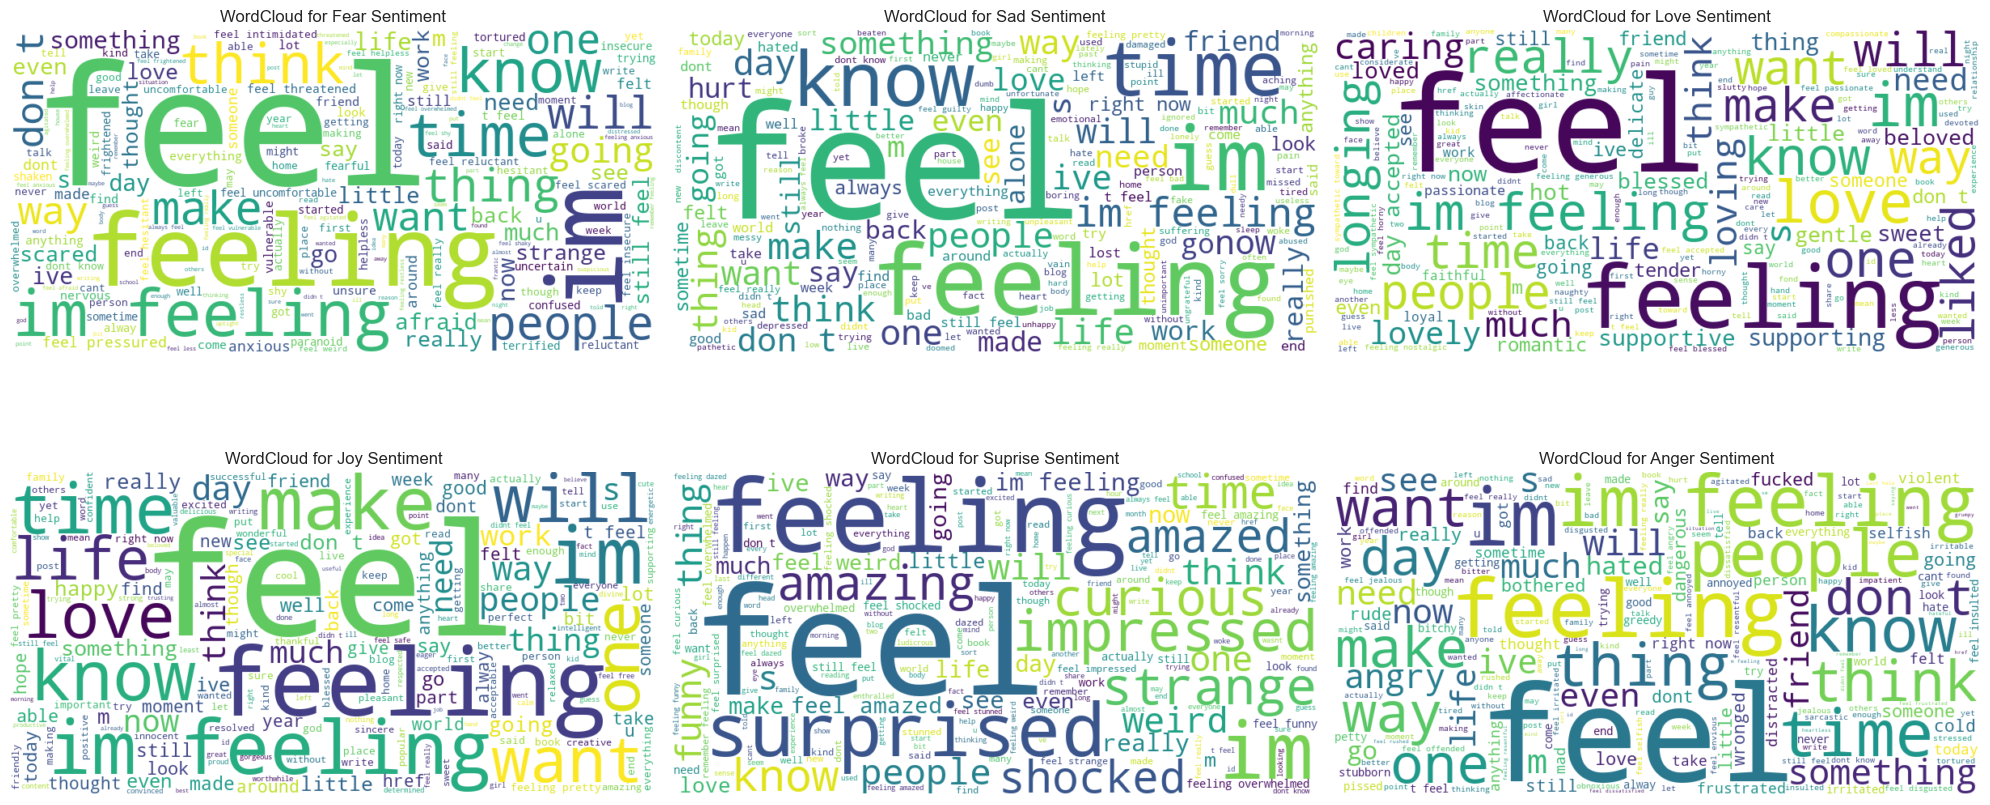

In [17]:
plot_wordcloud(df_em_clean, 'emotion', 'sentence')

In [18]:
vectorizer_path = "../save_emo_models/ml_vectorizer.pkl"


=== logistic_regression ===
Best Params: OrderedDict([('C', 22.364202820542708)])

Comparison of Metrics Between Logistic Regression Models:


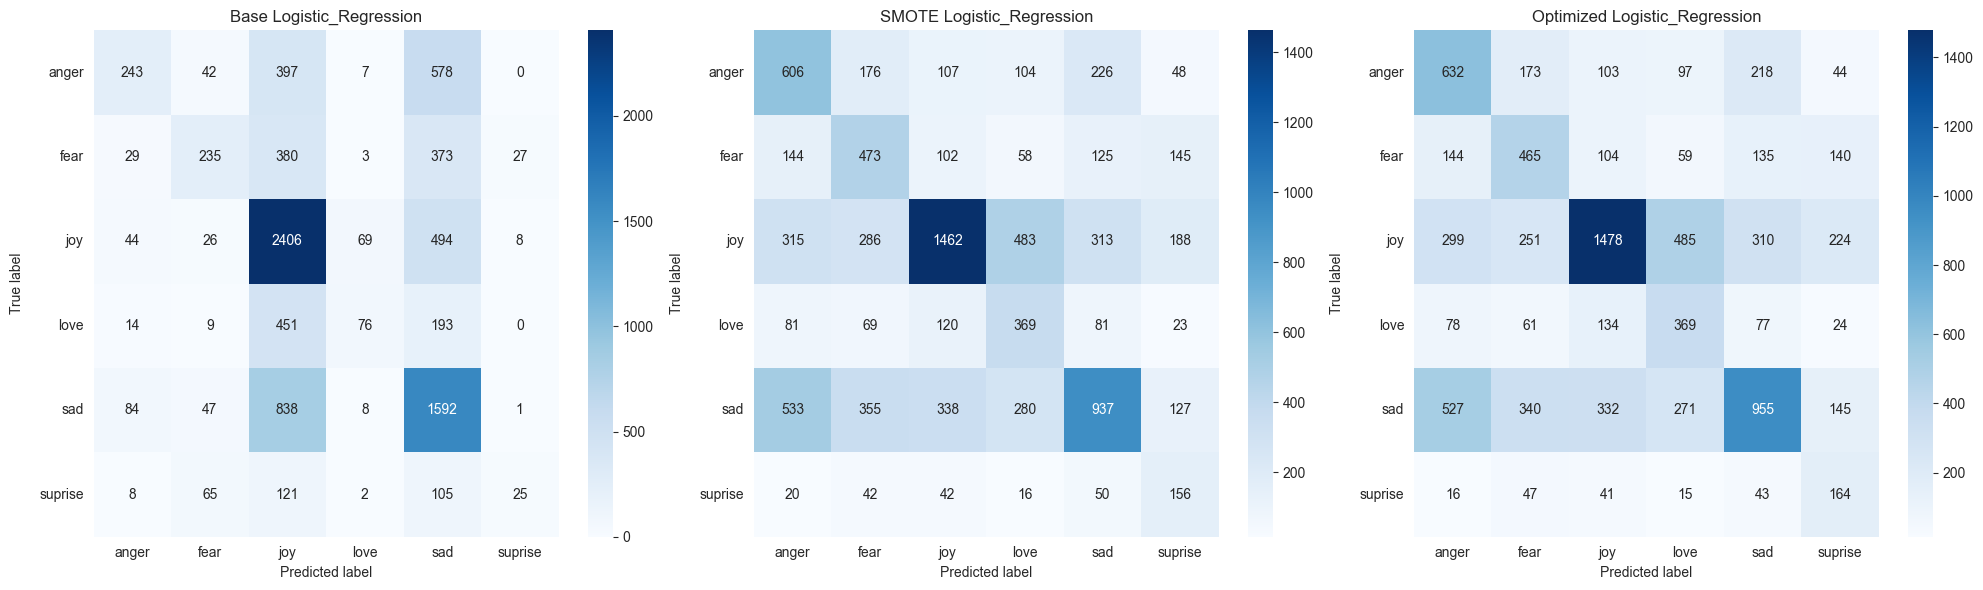

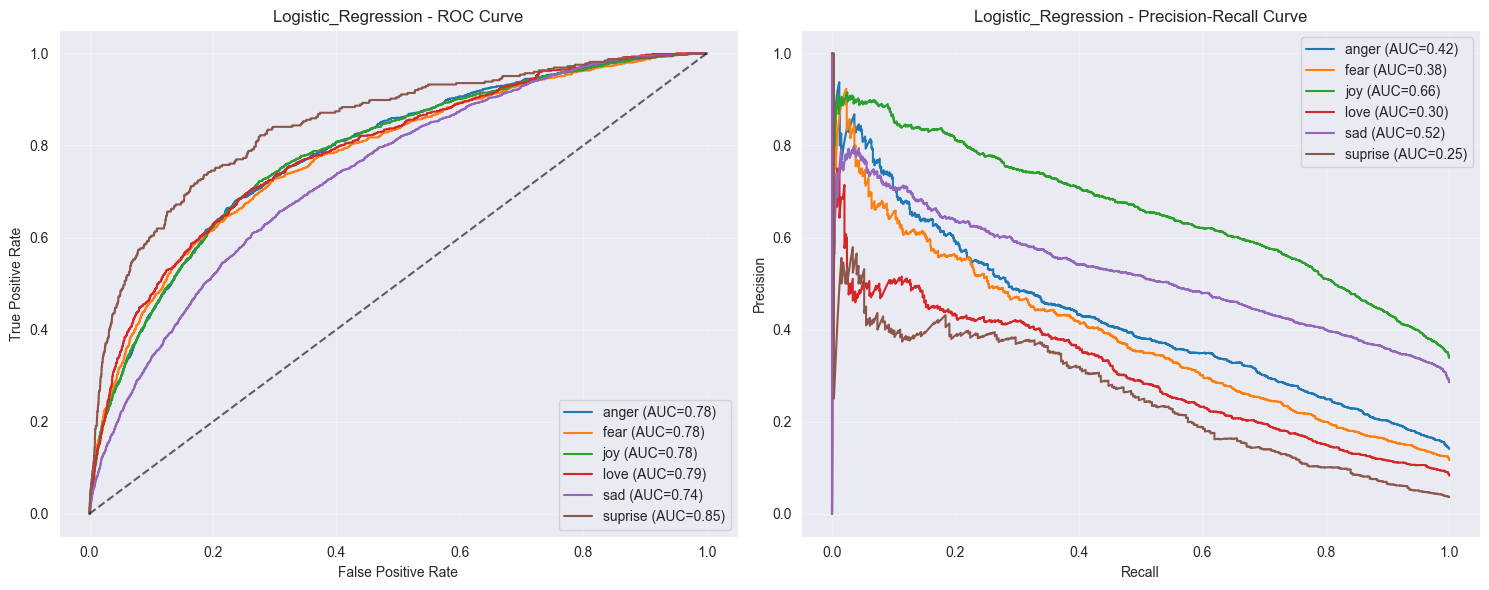

In [19]:
# === RUN END-TO-END ===
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "logistic_regression",
                                             vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "logistic_regression", best_model)

# Display summary
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Logistic Regression Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Logistic_Regression")
plot_training_metrics(preds, "Logistic_Regression")


=== naive_bayes ===
Best Params: OrderedDict([('alpha', 0.06610098295419149)])

Comparison of Metrics Between Naive Bayes Models:


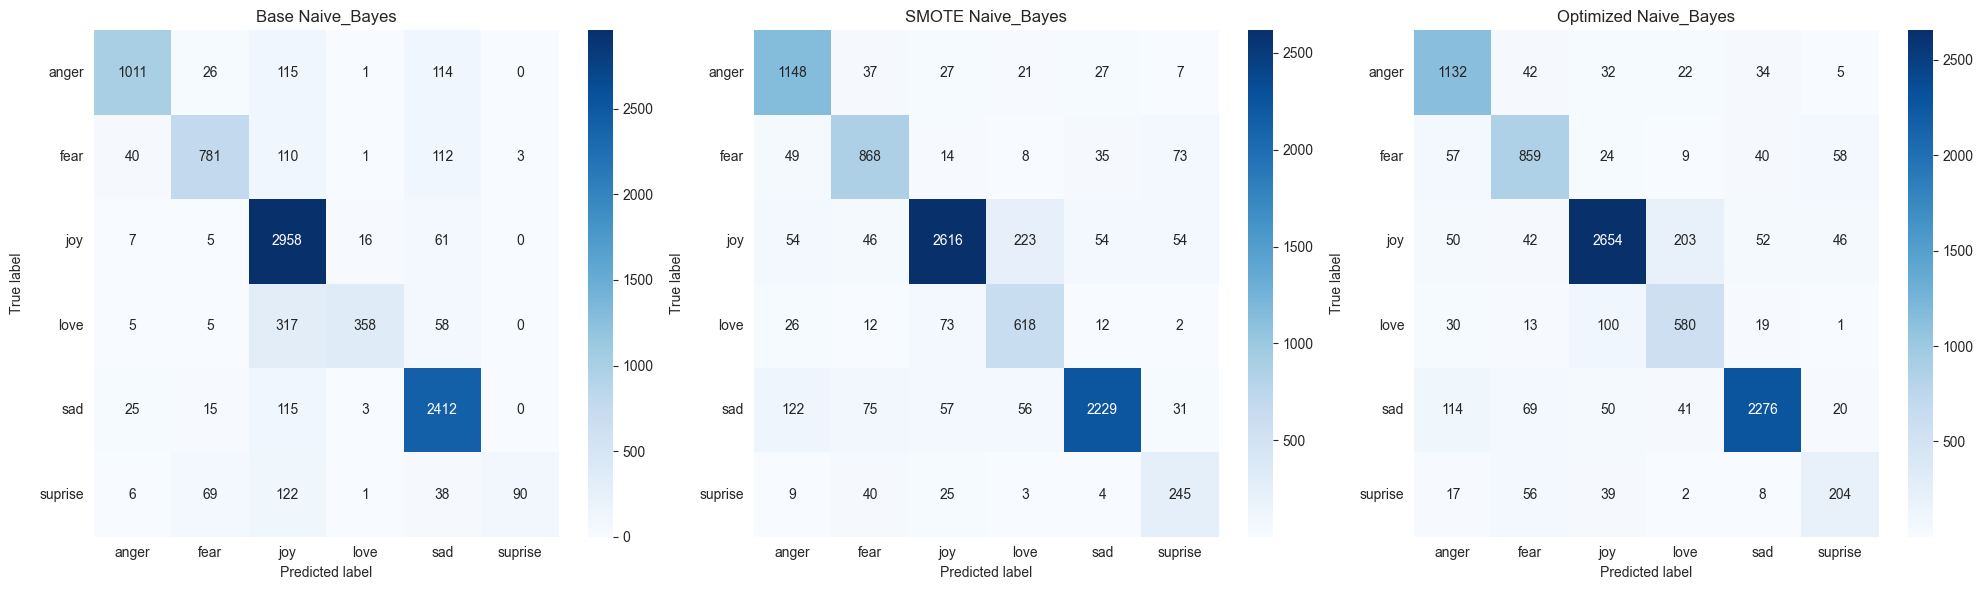

In [20]:
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "naive_bayes", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "naive_bayes", best_model)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Naive Bayes Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "Naive_Bayes")


=== random_forest ===
Best Params: OrderedDict([('max_depth', 13), ('n_estimators', 182)])

Comparison of Metrics Between Random Forest Models:


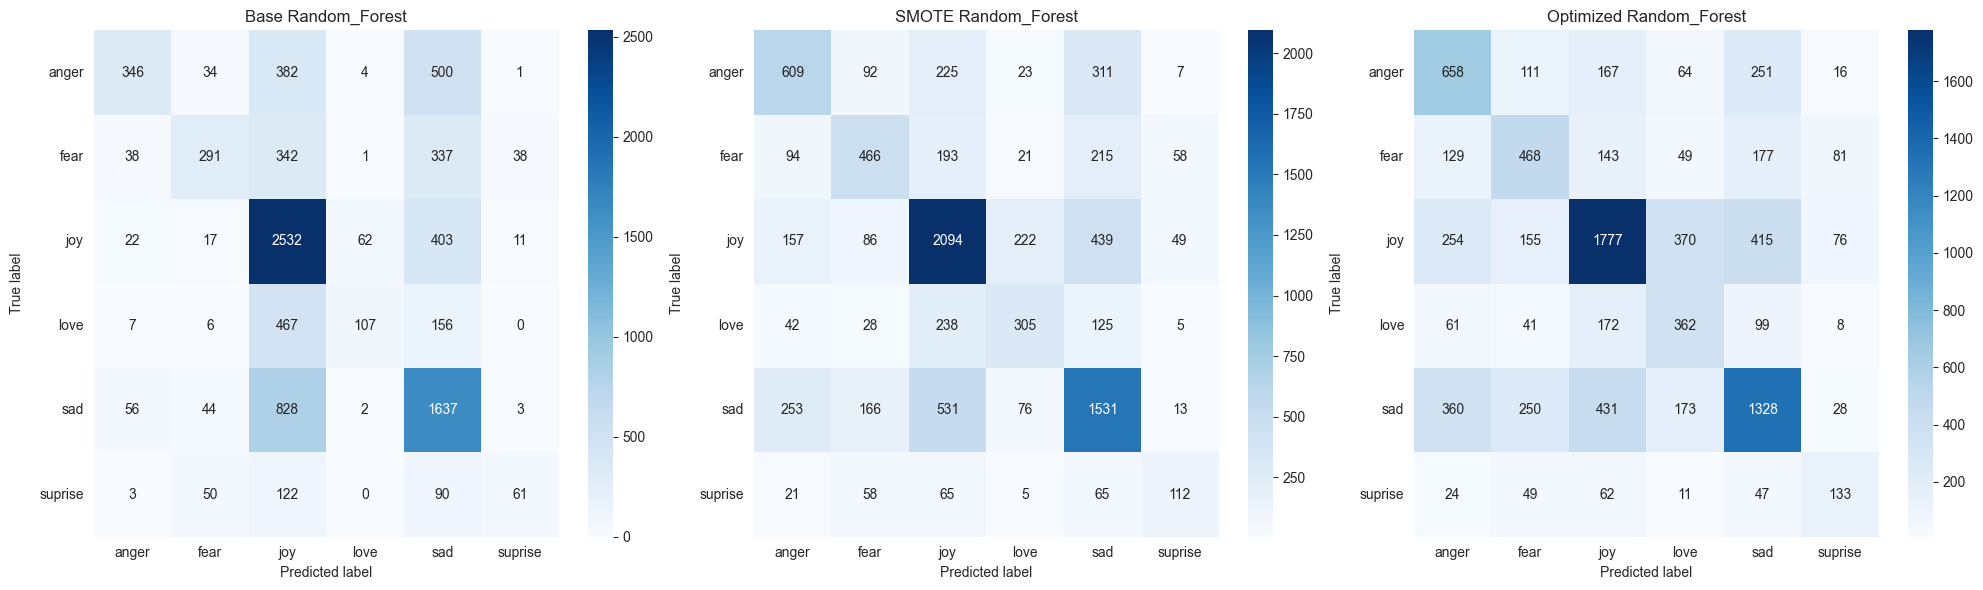

In [21]:
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "random_forest", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "random_forest", best_model)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Random Forest Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "Random_Forest")


=== xgboost ===


/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:28:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:28:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

Best Params: OrderedDict([('learning_rate', 0.17255364529395611), ('max_depth', 7), ('n_estimators', 96)])

Comparison of Metrics Between XGBoost Models:


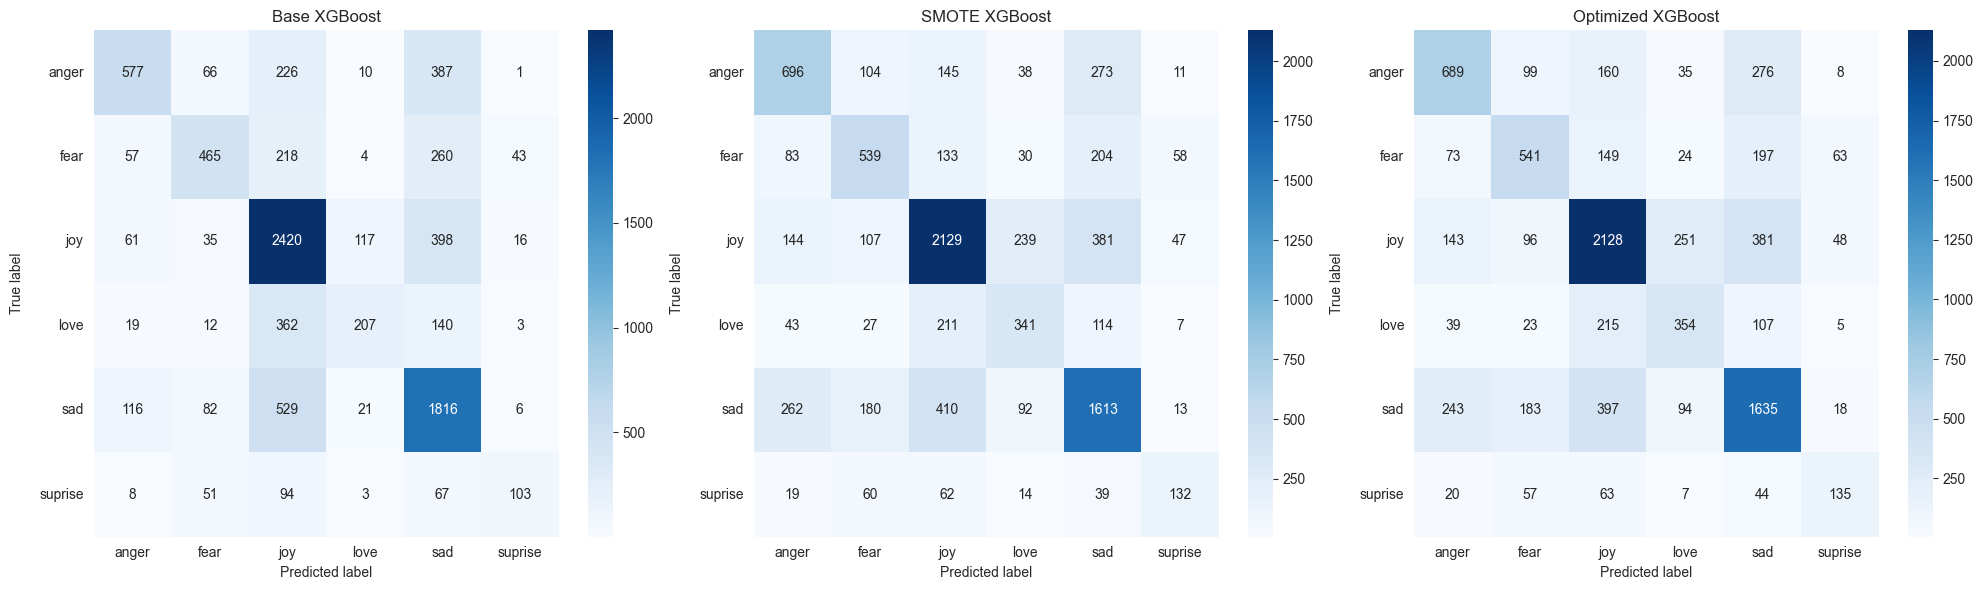

In [22]:
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "xgboost", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "xgboost", best_model)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between XGBoost Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "XGBoost")

## DEEP LEARNING MODEL

In [23]:
tokenizer_path = "../save_emo_models/dl_tokenizer.pkl"

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

Comparison of Metrics Between LSTM Models:


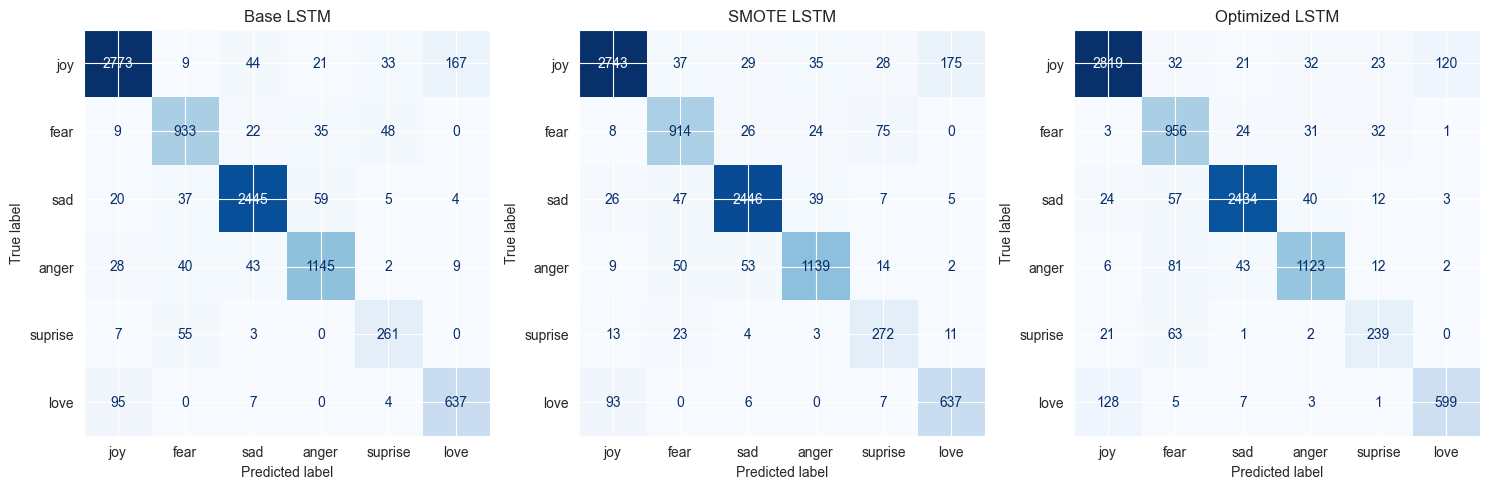

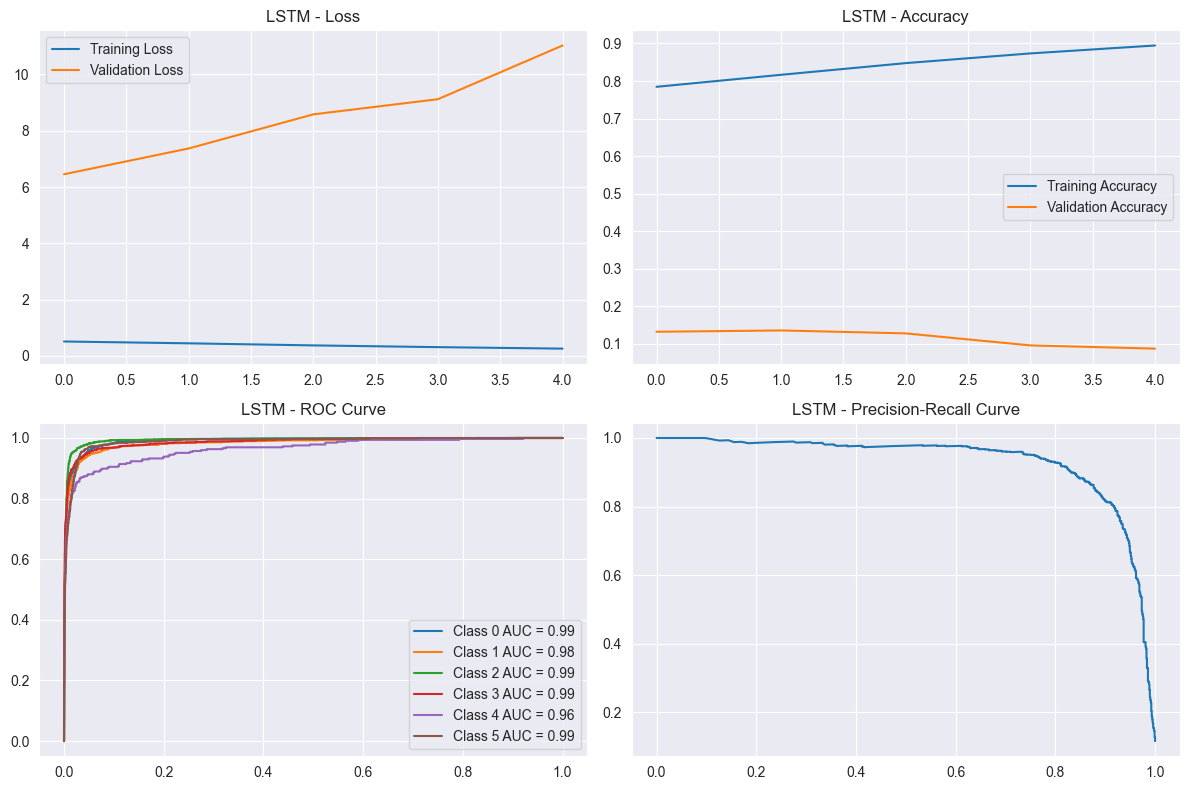

In [24]:
results, preds, opt_history = run_dl_workflow(df_em_clean, "sentence",
                                              "emotion", "LSTM", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "LSTM", opt_history)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between LSTM Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "LSTM")
plot_dl_training_metrics(opt_history, preds, "LSTM")

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Comparison of Metrics Between GRU Models:


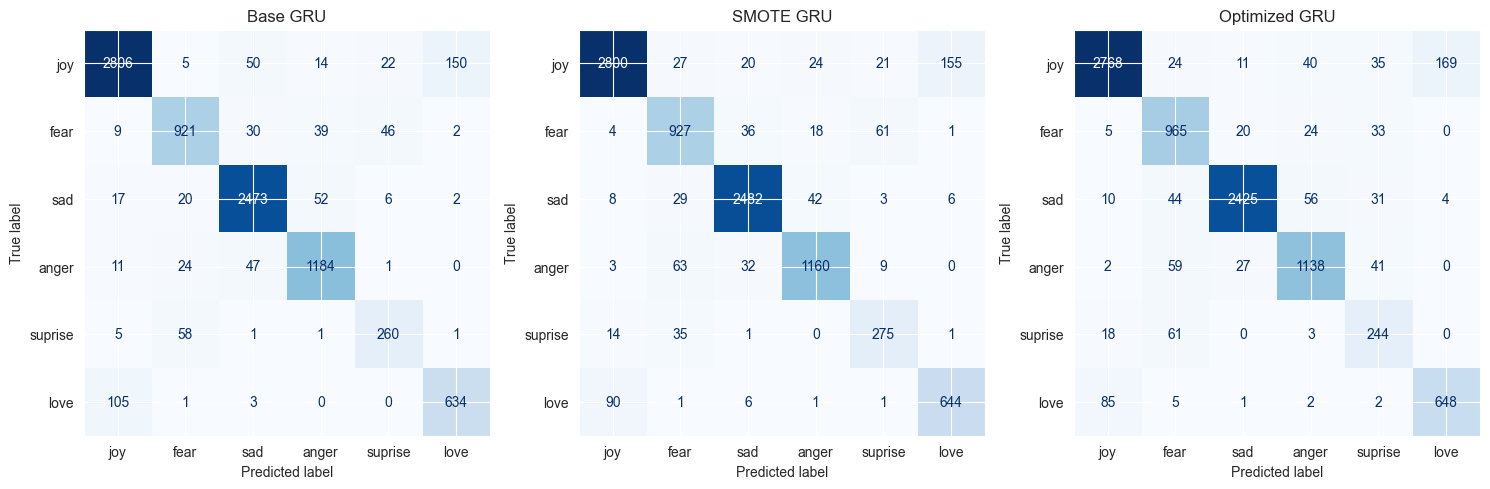

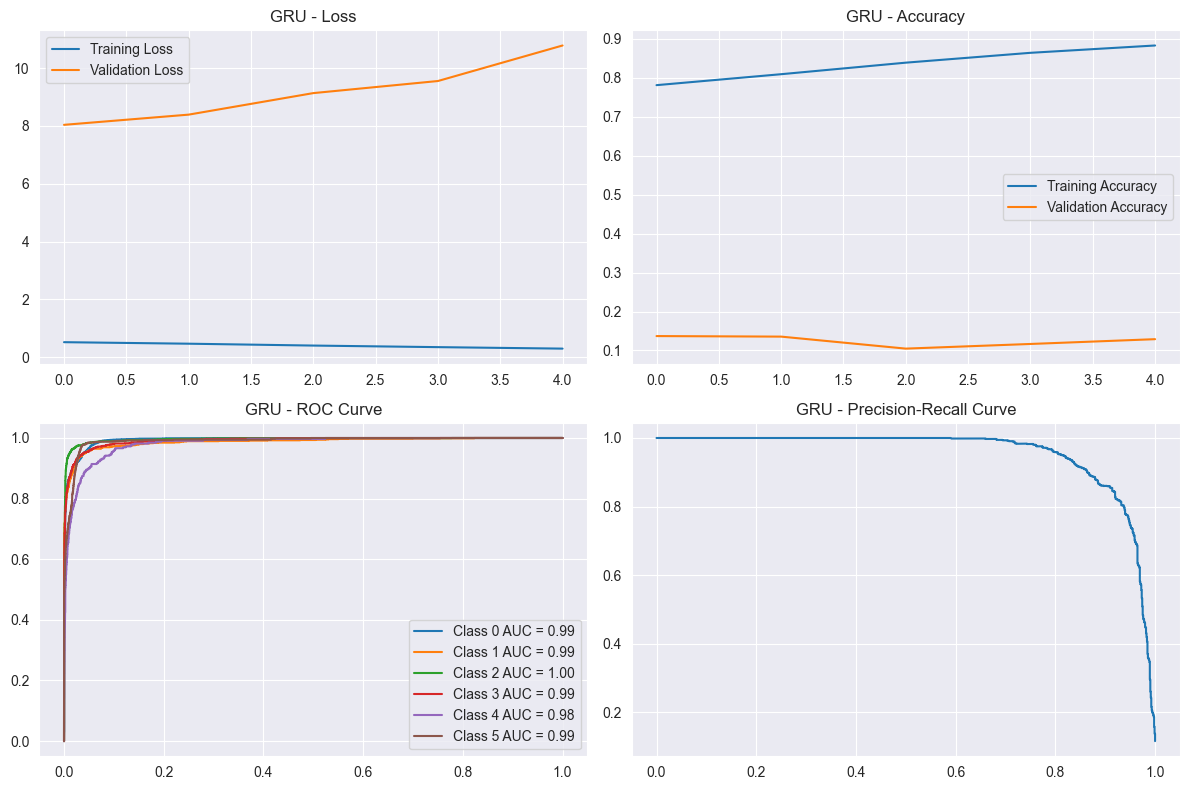

In [25]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_em_clean, "sentence",
                                              "emotion", "GRU", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "GRU", opt_history)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between GRU Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "GRU")
plot_dl_training_metrics(opt_history, preds, "GRU")

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Comparison of Metrics Between CNN Models:


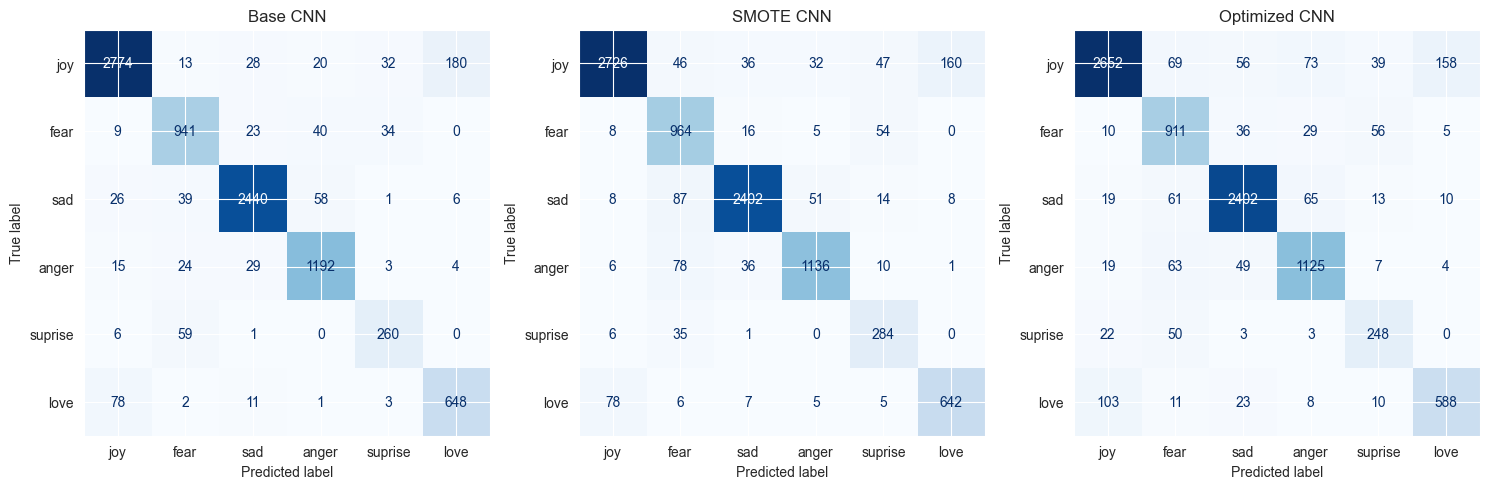

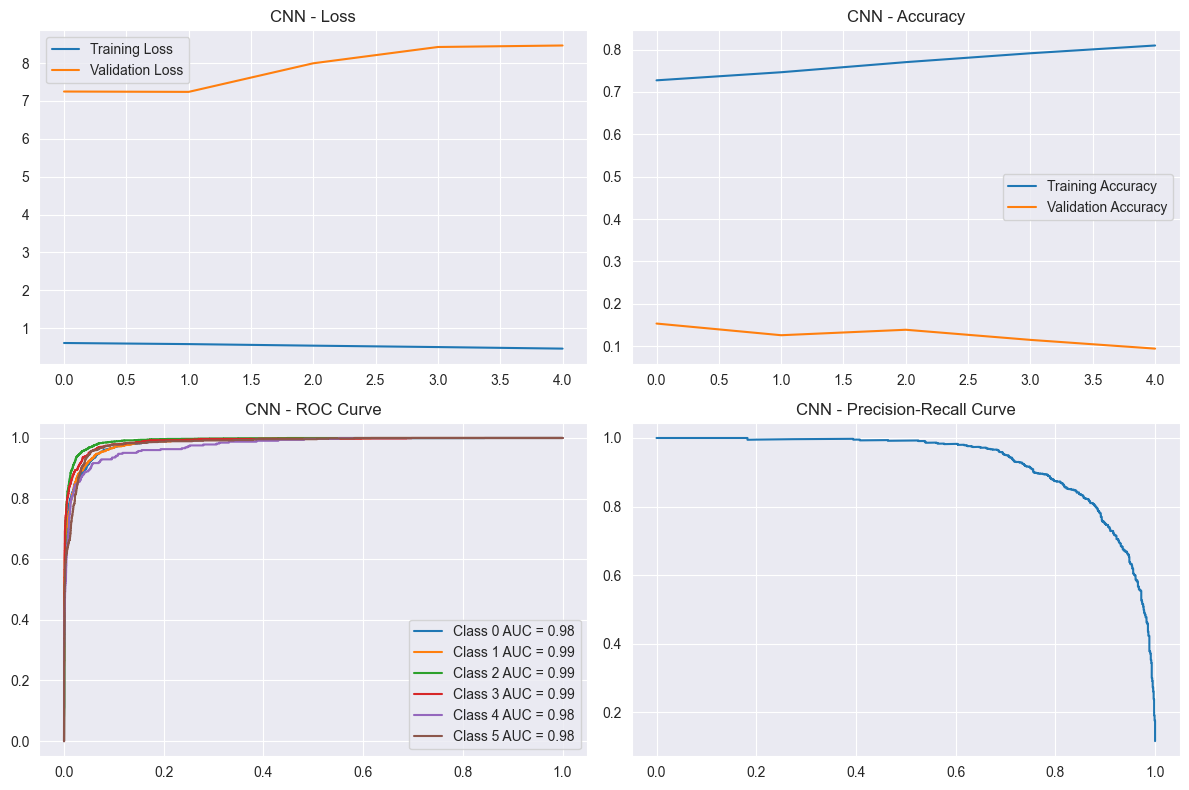

In [26]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_em_clean, "sentence",
                                              "emotion", "CNN", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "CNN", opt_history)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between CNN Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "CNN")
plot_dl_training_metrics(opt_history, preds, "CNN")

In [27]:
import joblib
import pandas as pd

opt_summary_df = pd.DataFrame(optimized_models_summary)

# # Sort by F1-Score in descending order
ranked_df = opt_summary_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
ranked_df["Rank"] = ranked_df.index + 1           # rank column
df_rank = ranked_df.drop(columns=['Rank'], errors='ignore')

df_rank = df_rank.copy()

In [28]:
import joblib
import os

# Create directory if it doesn't exist
os.makedirs("../save_emo_models", exist_ok=True)

# Loop through all ranked models and save with position
for idx, row in df_rank.iterrows():
    model = row["Object"]
    model_name = row["Model"].lower().replace(" ", "_")  # sanitize name
    filename = f"sent_{idx+1}_{model_name}_model.pkl"
    filepath = os.path.join("../save_emo_models", filename)

    joblib.dump(model, filepath)
    print(f"Saved: {filename}")


Saved: sent_1_gru_model.pkl
Saved: sent_2_lstm_model.pkl
Saved: sent_3_cnn_model.pkl
Saved: sent_4_naive_bayes_model.pkl
Saved: sent_5_xgboost_model.pkl
Saved: sent_6_random_forest_model.pkl
Saved: sent_7_logistic_regression_model.pkl


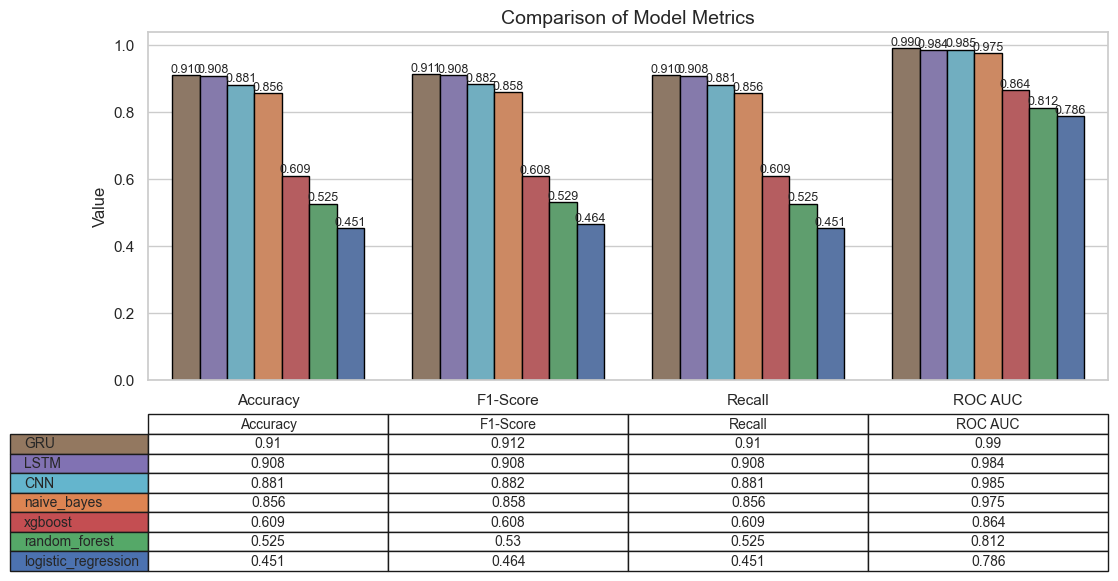

In [29]:
plot_model_comparison(df_rank)